**Installing Libraries**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the Dataset**

In [87]:
data = pd.read_csv('train.csv' ,header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,8.4,0.40,0.70,13.1,0.042,29.0,197.0,0.99800,3.06,0.64,9.7,5
2,7.8,0.17,0.23,1.7,0.029,39.0,128.0,0.99272,3.37,0.41,10.7,7
3,6.2,0.18,0.49,4.5,0.047,17.0,90.0,0.99190,3.27,0.37,11.6,6
4,6.5,0.26,0.24,10.8,0.042,47.0,130.0,0.99600,3.08,0.40,10.1,6


In [88]:
data.columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [89]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.858435,0.278051,0.334160,6.442407,0.045539,35.222818,138.300664,0.994051,3.187157,0.489377,10.507517,5.876723
std,0.835202,0.099147,0.121689,5.098740,0.020888,16.537835,42.061782,0.003004,0.149727,0.113204,1.232936,0.888392
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991753,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.275000,0.043000,34.000000,135.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,167.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.200000,9.000000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 367.4 KB


In [91]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Class imbalance**

In [92]:
data['quality'].value_counts()

6    1749
5    1171
7     704
8     142
4     132
3      16
9       4
Name: quality, dtype: int64

**Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


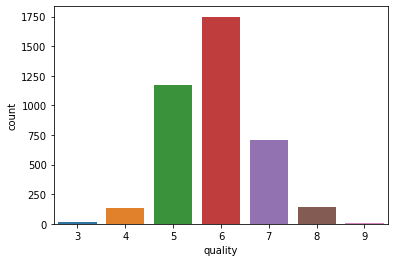

In [93]:
sns.countplot(data['quality'])

**Bivariate Analysis**

No handles with labels found to put in legend.


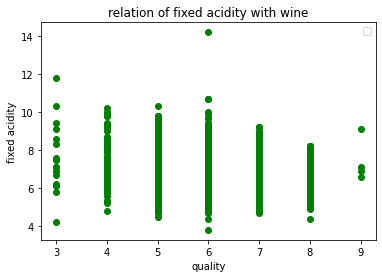

In [94]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(data['quality'], data['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No handles with labels found to put in legend.


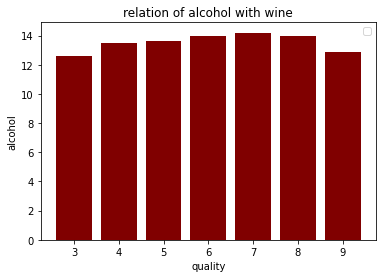

In [95]:
# checking the variation of fixed acidity in the different qualities of wine

plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

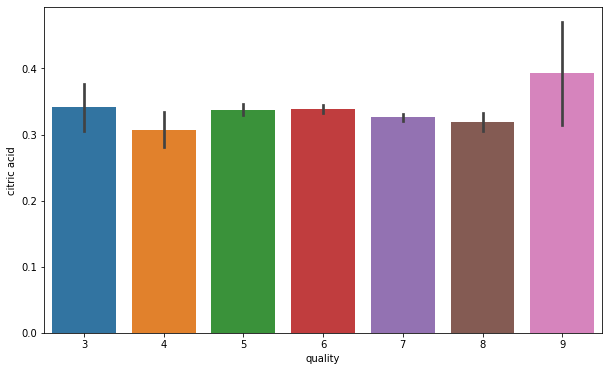

In [96]:
# Composition of citric acid go higher as we go higher in the quality of the wine

import seaborn as sns

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)



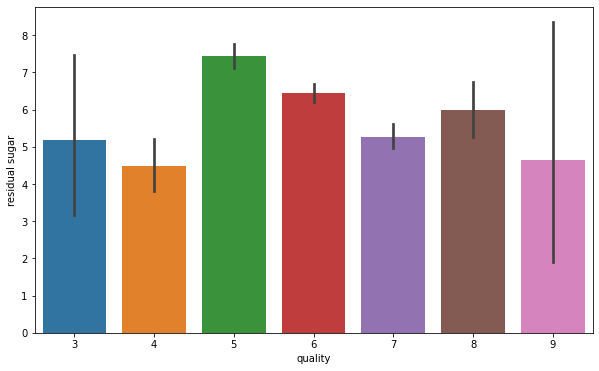

In [97]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

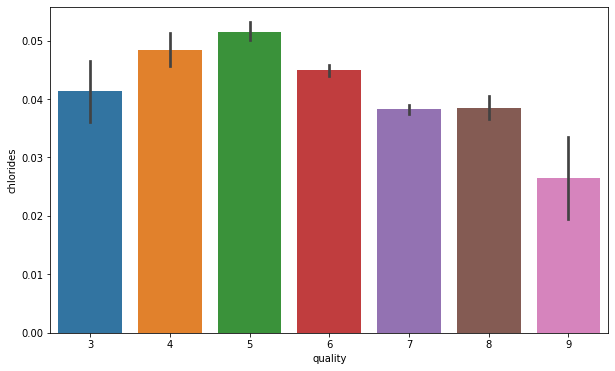

In [98]:
#Composition of chloride also go down as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

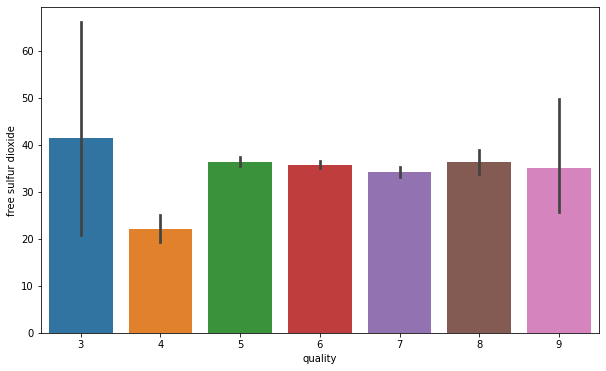

In [99]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

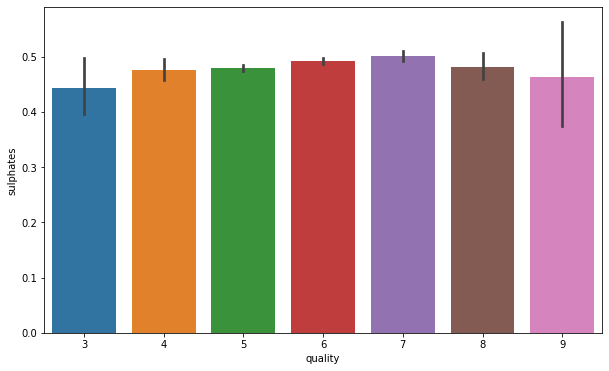

In [100]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

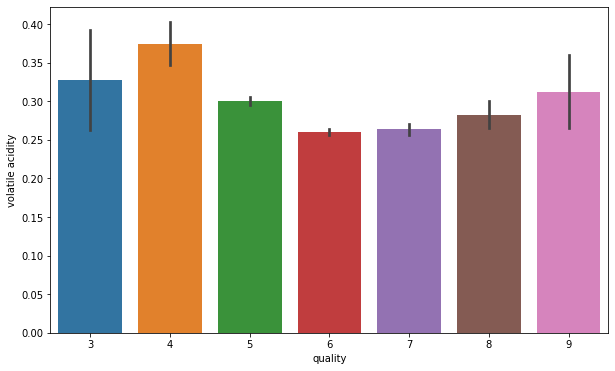

In [101]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

As we can see that like the above two items do not have very strong relation to the dependent variable we have to showcase a correlation plot to check which of the items are more related to the dependent variable and which items are less related to the dependent variables.

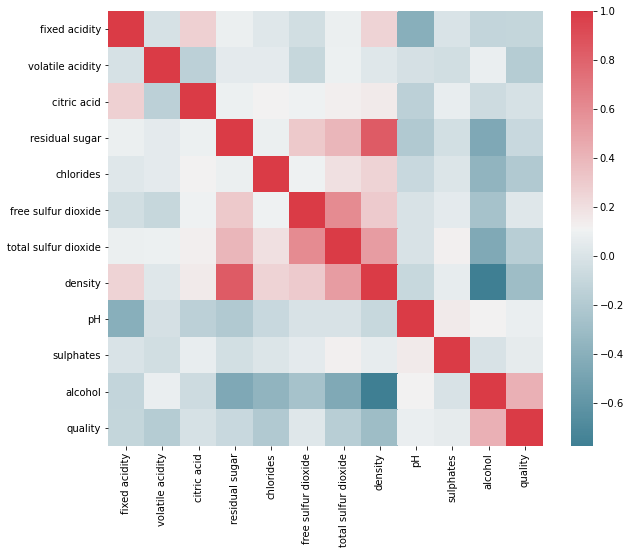

In [102]:

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other.
For Example, 
# The strongly correlated items are :

1.fixed acidity and citric acid.
2.free sulphur dioxide and total sulphor dioxide.
3.fixed acidity and density.
4. alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

# The weekly correlated items are :

1.citric acid and volatile acidity.
2.fixed acidity and ph.
3.density and alcohol.

These are some relations which do not depend on each other at all.

In [ ]:
sns.pairplot(data)

**Data pre-processing**


1.   Loading
2.   Normalizaiton
1.   PCA
2.   Train and Test split

In [118]:
X=data.drop(columns=['quality'])
y=data['quality'].values
print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               8.4              0.40         0.70  ...  3.06       0.64      9.7
2               7.8              0.17         0.23  ...  3.37       0.41     10.7
3               6.2              0.18         0.49  ...  3.27       0.37     11.6
4               6.5              0.26         0.24  ...  3.08       0.40     10.1
...             ...               ...          ...  ...   ...        ...      ...
3913            6.4              0.18         0.32  ...  3.35       0.49      9.4
3914            6.5              0.22         0.19  ...  3.05       0.50      9.5
3915            5.4              0.29         0.47  ...  3.29       0.75     10.0
3916            6.6              0.20         0.38  ...  3.32       0.56     11.0
3917            7.1              0.28         0.26  ...  3.06       0.59     11.2

[3918 rows x 11

In [119]:
# standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

array([29.3, 43.2, 54.3, 63.6, 72.6, 81.1, 87.8, 93.3, 97.1])

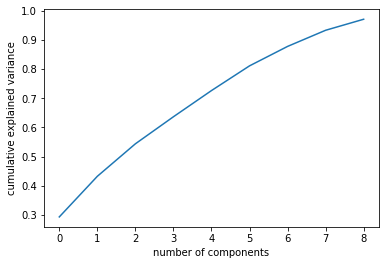

In [106]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
pca.fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

In [107]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [108]:
from sklearn.model_selection import train_test_split
def TestTrainSplit(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2489)
  return X_train, X_test, y_train, y_test 

# **SMOTE**

In [109]:
!pip install imbalanced-learn

In [110]:
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample=SMOTE(kind='regular',k_neighbors=2)
X_SMOTE, y_SMOTE = oversample.fit_resample(X, y)

In [112]:
from collections import Counter
Counter(y_SMOTE)

Counter({3: 1749, 4: 1749, 5: 1749, 6: 1749, 7: 1749, 8: 1749, 9: 1749})

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score

In [122]:
from sklearn.ensemble import RandomForestClassifier

def RFC():
  #X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.25, random_state = 2489)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2489)


  # creating the model
  model = RandomForestClassifier(n_estimators = 200)

  # feeding the training set into the model
  model.fit(X_train, y_train)

  # predicting the results for the test set
  y_pred = model.predict(X_test)

  # calculating the training and testing accuracies
  print("Training accuracy :", model.score(X_train, y_train))
  print("Testing accuracy :", model.score(X_test, y_test))

  # classification report
  print(classification_report(y_test, y_pred))

  # confusion matrix
  print(confusion_matrix(y_test, y_pred))

  model_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
  print('mean ', model_eval.mean())

RFC()

Training accuracy : 1.0
Testing accuracy : 0.6520408163265307
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.70      0.18      0.29        38
           5       0.66      0.64      0.65       287
           6       0.65      0.78      0.71       454
           7       0.63      0.53      0.58       160
           8       0.79      0.33      0.47        33
           9       0.00      0.00      0.00         2

    accuracy                           0.65       980
   macro avg       0.49      0.35      0.38       980
weighted avg       0.65      0.65      0.64       980

[[  0   0   2   4   0   0   0]
 [  0   7  21  10   0   0   0]
 [  0   2 184  92   7   2   0]
 [  0   1  67 352  34   0   0]
 [  0   0   6  68  85   1   0]
 [  0   0   0  14   8  11   0]
 [  0   0   0   1   1   0   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


mean  0.6371584128531959


In [ ]:
import xgboost as xgb

def XGB():
  #X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.25, random_state = 2489)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2489)

  # creating the model
  model = xgb.XGBClassifier(random_state=2489)

  # feeding the training set into the model
  model.fit(X_train, y_train)

  # predicting the results for the test set
  y_pred = model.predict(X_test)

  # calculating the training and testing accuracies
  print("Training accuracy :", model.score(X_train, y_train))
  print("Testing accuracy :", model.score(X_test, y_test))

  # classification report
  print(classification_report(y_test, y_pred))

  # confusion matrix
  print(confusion_matrix(y_test, y_pred))

  model_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
  print('mean ', model_eval.mean())

XGB()

# Manual balancing of classes

In [ ]:
from sklearn.neural_network import MLPClassifier

def MLP():
  X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.25, random_state = 2489)
  # creating the model
  model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

  # feeding the training data to the model
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  # calculating the accuracies
  print("training accuracy :", model.score(X_train, y_train))
  print("testing accuracy :", model.score(X_test, y_test))
  # classification report
  print(classification_report(y_test, y_pred))
  # confusion matrix
  print(confusion_matrix(y_test, y_pred))
  model_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
  model_eval.mean()

MLP()  

In [123]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [126]:
from sklearn.ensemble import RandomForestClassifier

def RFC():

  df=data.drop(columns=['quality'])
  X=df[['volatile acidity','free sulfur dioxide','alcohol']]

  y=data['quality'].values
  print(X)
  print(y)

  #X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.25, random_state = 2489)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2489)

  # creating the model
  model = RandomForestClassifier(n_estimators = 10000,verbose=2,n_jobs=-1)

  # feeding the training set into the model
  model.fit(X_train, y_train)

  # predicting the results for the test set
  y_pred = model.predict(X_test)

  # calculating the training and testing accuracies
  print("Training accuracy :", model.score(X_train, y_train))
  print("Testing accuracy :", model.score(X_test, y_test))

  # classification report
  print(classification_report(y_test, y_pred))

  # confusion matrix
  print(confusion_matrix(y_test, y_pred))

  model_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
  print('mean ', model_eval.mean())

RFC()

      volatile acidity  free sulfur dioxide  alcohol
0                 0.27                 45.0      8.8
1                 0.40                 29.0      9.7
2                 0.17                 39.0     10.7
3                 0.18                 17.0     11.6
4                 0.26                 47.0     10.1
...                ...                  ...      ...
3913              0.18                 24.0      9.4
3914              0.22                 36.0      9.5
3915              0.29                 47.0     10.0
3916              0.20                 30.0     11.0
3917              0.28                 50.0     11.2

[3918 rows x 3 columns]
[6 5 7 ... 6 7 6]
Training accuracy : 0.9891512444160817
Testing accuracy : 0.6198979591836735
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.64      0.25      0.36        28
           5       0.65      0.64      0.64       240
           6       0.63    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


mean  0.6056307360452575


In [162]:
from sklearn.utils import resample

In [148]:
data['quality'].value_counts()

6    1749
5    1171
7     704
8     142
4     132
3      16
9       4
Name: quality, dtype: int64

In [151]:
df=data.copy()

**Up-sample Minority Class**

In [176]:
df=data.copy()
# Separate majority and minority classes
df_majority = df[df.quality==7]
df_minority1 = df[df.quality==9]
 
# Upsample minority class
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=704,    # to match majority class
                                 random_state=123) # reproducible results

#==========================
df_minority2 = df[df.quality==3]
 
# Upsample minority class
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=704,    # to match majority class
                                 random_state=123) # reproducible results
 
#===============================
df_minority3 = df[df.quality==4]
 # Upsample minority class
df_minority_upsampled3 = resample(df_minority3, 
                                 replace=True,     # sample with replacement
                                 n_samples=704,    # to match majority class
                                 random_state=123) # reproducible results
 
#===============================
df_minority4 = df[df.quality==8]
 
# Upsample minority class
df_minority_upsampled4 = resample(df_minority4, 
                                 replace=True,     # sample with replacement
                                 n_samples=704,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3,df_minority_upsampled4])

 
# Display new class counts
df_upsampled.quality.value_counts()

9    704
7    704
3    704
8    704
4    704
Name: quality, dtype: int64

**Down-sample Majority Class**

In [184]:
df_majority1 = df[df.quality==6]
df_minority = df[df.quality==7]
 
# Downsample majority class
df_majority_downsampled1 = resample(df_majority1, 
                                 replace=False,    # sample without replacement
                                 n_samples=704,     # to match minority class
                                 random_state=123) # reproducible results
df_majority2 = df[df.quality==5]                                 
# Downsample majority class
df_majority_downsampled2 = resample(df_majority2, 
                                 replace=False,    # sample without replacement
                                 n_samples=704,     # to match minority class
                                 random_state=123) # reproducible results                                 
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled1,df_majority_downsampled2, df_minority])
 
df_downsampled=df_downsampled[df_downsampled['quality'] != 7]
# Display new class counts
df_downsampled.quality.value_counts()

6    704
5    704
Name: quality, dtype: int64

In [186]:
#https://elitedatascience.com/imbalanced-classes
df_balanced= pd.concat([df_downsampled,df_upsampled])
df_balanced.quality.value_counts()

7    704
3    704
6    704
9    704
5    704
8    704
4    704
Name: quality, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def RFC():

  df=df_balanced.drop(columns=['quality'])
  X=df_balanced[['volatile acidity','free sulfur dioxide','alcohol']]
  y=df_balanced['quality'].values
  print(X)
  print(y)

  #X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.25, random_state = 2489)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2489)

  # creating the model
  model = RandomForestClassifier(n_estimators = 10000,verbose=2,n_jobs=-1)

  # feeding the training set into the model
  model.fit(X_train, y_train)

  # predicting the results for the test set
  y_pred = model.predict(X_test)

  # calculating the training and testing accuracies
  print("Training accuracy :", model.score(X_train, y_train))
  print("Testing accuracy :", model.score(X_test, y_test))

  # classification report
  print(classification_report(y_test, y_pred))

  # confusion matrix
  print(confusion_matrix(y_test, y_pred))

  model_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
  print('mean ', model_eval.mean())

RFC()

In [195]:
from sklearn.utils import resample

def MySMOTE(data):
  df=data.copy()
  # Separate majority and minority classes
  df_majority = df[df.quality==7]
  df_minority1 = df[df.quality==9]
  
  # Upsample minority class
  df_minority_upsampled1 = resample(df_minority1, 
                                  replace=True,     # sample with replacement
                                  n_samples=704,    # to match majority class
                                  random_state=123) # reproducible results
  
  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_majority, df_minority_upsampled1])

  #==========================
  df_minority2 = df[df.quality==3]
  
  # Upsample minority class
  df_minority_upsampled2 = resample(df_minority2, 
                                  replace=True,     # sample with replacement
                                  n_samples=704,    # to match majority class
                                  random_state=123) # reproducible results
  
  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_majority, df_minority_upsampled1,df_minority_upsampled2])

  #===============================
  df_minority3 = df[df.quality==4]
  
  # Upsample minority class
  df_minority_upsampled3 = resample(df_minority3, 
                                  replace=True,     # sample with replacement
                                  n_samples=704,    # to match majority class
                                  random_state=123) # reproducible results
  
  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_majority, df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3])

  #===============================
  df_minority4 = df[df.quality==8]
  
  # Upsample minority class
  df_minority_upsampled4 = resample(df_minority4, 
                                  replace=True,     # sample with replacement
                                  n_samples=704,    # to match majority class
                                  random_state=123) # reproducible results
  
  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_majority, df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3,df_minority_upsampled4])
  
  # Display new class counts
  df_upsampled.quality.value_counts()

  df_majority1 = df[df.quality==6]
  df_minority = df[df.quality==7]
  
  # Downsample majority class
  df_majority_downsampled1 = resample(df_majority1, 
                                  replace=False,    # sample without replacement
                                  n_samples=704,     # to match minority class
                                  random_state=123) # reproducible results
  df_majority2 = df[df.quality==5]                                 
  # Downsample majority class
  df_majority_downsampled2 = resample(df_majority2, 
                                  replace=False,    # sample without replacement
                                  n_samples=704,     # to match minority class
                                  random_state=123) # reproducible results                                 
  
  # Combine minority class with downsampled majority class
  df_downsampled = pd.concat([df_majority_downsampled1,df_majority_downsampled2, df_minority])
  
  df_downsampled=df_downsampled[df_downsampled['quality'] != 7]
  # Display new class counts
  df_downsampled.quality.value_counts()

  df_balanced= pd.concat([df_downsampled,df_upsampled])
  df_balanced.quality.value_counts()  

  print(df.shape)

  print(df_balanced.shape)

  return df_balanced

In [198]:
df_balanced.shape

(4928, 12)

In [196]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

class Submission():
    def __init__(self, train_data_path, test_data_path):
        self.train_data = pd.read_csv(train_data_path, header=None)
        self.train_data.columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 
                                 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality']
        self.test_data = pd.read_csv(test_data_path,header=None)
        self.test_data.drop(0,inplace=True)

    def predict(self):

        df_balanced= MySMOTE(self.train_data) # Rectify imablance in the data        
        X=df_balanced[['volatile acidity','free sulfur dioxide','alcohol']] #Feature selection
        y=df['quality'].values

        sc = StandardScaler()
        X = sc.fit_transform(X)

        # Train the model
        # creating the model
        model = RandomForestClassifier(n_estimators = 200,n_jobs=-1,verbose=2)
        model.fit(X, y)

        # Predict on test set and save the prediction
        submission = model.predict(self.test_data)
        submission = pd.DataFrame(submission)
        submission.to_csv('submission.csv',header=['quality'],index=False)
		

submission1 = Submission('train.csv','test.csv')
print("submission1")
submission1.predict()


submission1
(3918, 12)
(4928, 12)
building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


ValueError: ignored